In [ ]:
import config as config
import mne
import numpy as np
from mne.preprocessing import ICA
from src.dataset.data_loader import DataLoader
from matplotlib import pyplot as plt
from pathlib import Path
from src.utils.graphics import styled_print
from src.analysis.registery import Registery


In [ ]:
reg = Registery()

In [21]:
def create_epochs_for_all(
            registery,
            trial_mode, trial_unit, experiment_mode, 
            trial_boundary, trial_type, modality, 
            tmin, tmax
        ):
        styled_print('', 'Creating EPOCHS for all subjects',color='red')
        epochs = {}

        for (subject, session), raw in registery.raw_data.items():
            styled_print('', f'Loading for sub-{subject}, ses-{session}', color='green')
            data_loader = DataLoader(
                eeg_data=raw, trial_mode=trial_mode, trial_unit=trial_unit,
                experiment_mode=experiment_mode, trial_boundary=trial_boundary,
                trial_type=trial_type, modality=modality
            )
            try:
                epochs[(subject, session)] = data_loader.create_epochs(tmin=tmin, tmax=tmax)
            except:
                continue

        return epochs

In [36]:
def plot_vs_fixation_all_subjects(
        registery, trial_mode, trial_unit, experiment_mode,
        trial_boundary, trial_type, modality, selected_channels=None
    ):
    """Plots evoked responses in selected channels across all subjects."""

    epochs_pictorial = create_epochs_for_all(
        registery=registery,
        trial_mode=trial_mode, trial_unit=trial_unit,
        experiment_mode=experiment_mode, trial_boundary=trial_boundary,
        trial_type=trial_type, modality=modality,
        tmin=-0.2, tmax=0.5
    )
    epochs_fixation = create_epochs_for_all(
        registery=registery,
        trial_mode=trial_mode, trial_unit=trial_unit,
        experiment_mode=experiment_mode, trial_boundary=trial_boundary,
        trial_type='Fixation', modality=modality,
        tmin=0.3, tmax=1.0
    )

    if not epochs_pictorial or not epochs_fixation:
        print("No epochs available for plotting.")
        return

    fig, axes = plt.subplots(5, 4, figsize=(15, 10), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, ((subject, session), epoch) in enumerate(epochs_pictorial.items()):
        evoked_pictorial = epoch.average()
        evoked_fixation = epochs_fixation[(subject, session)].average()

        if selected_channels != None:
            evoked_pictorial.pick_channels(selected_channels)
            evoked_fixation.pick_channels(selected_channels)
            picture_name = f'{trial_mode}_{trial_unit}_{experiment_mode}_{trial_boundary}_{trial_type}_Pictures_Fixation_Visual_p100_p300_plot_selected.png'
        else:
            picture_name = f'{trial_mode}_{trial_unit}_{experiment_mode}_{trial_boundary}_{trial_type}_Pictures_Fixation_Visual_p100_p300_plot_all.png'

        mean_signal_pictorial = np.mean(evoked_pictorial.data, axis=0)
        mean_signal_fixation = np.mean(evoked_fixation.data, axis=0)

        ax = axes[i]
        ax.plot(mean_signal_pictorial, label='Pictorial', color='green')
        ax.plot(mean_signal_fixation, label='Fixation', color='blue')

        ax.axvline(200, color='cyan', linestyle='--', label="Onset")
        ax.axvline(300, color='r', linestyle='--', label="100ms")
        ax.axvline(500, color='black', linestyle='--', label="300ms")

        ax.set_title(f"sub-{subject}_ses-{session}")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if i % 4 == 0:
            ax.set_ylabel("µV")
        if i >= 16:
            ax.set_xlabel("Time (s)")

    axes[0].legend(loc='upper left')
    plt.tight_layout()

    # Save figure
    images_dir = config.IMAGES_DIR
    image_filepath = Path(images_dir,picture_name)
    plt.savefig(image_filepath, dpi=600)
    print(f"Saved plot to {image_filepath}")


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use i

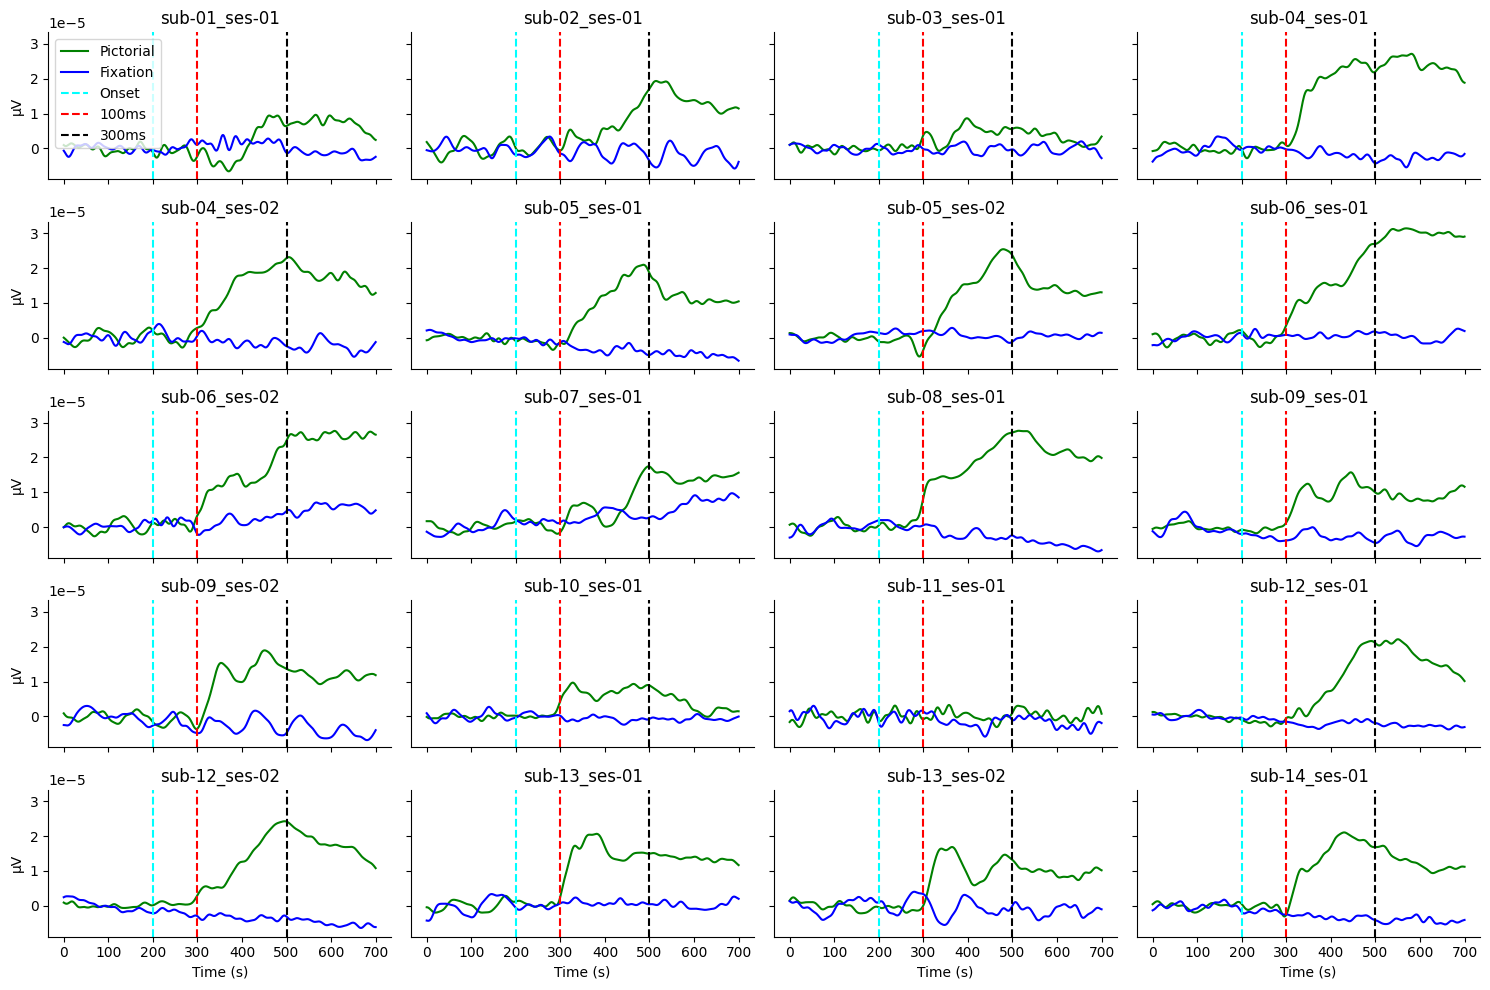

In [40]:
trial_mode='Silent'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
channels = ['PO3', 'POz', 'PO4']
plot_vs_fixation_all_subjects(
    registery=reg,
    trial_mode= trial_mode, trial_unit=trial_unit, 
    experiment_mode= experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality,
    selected_channels=channels
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use i

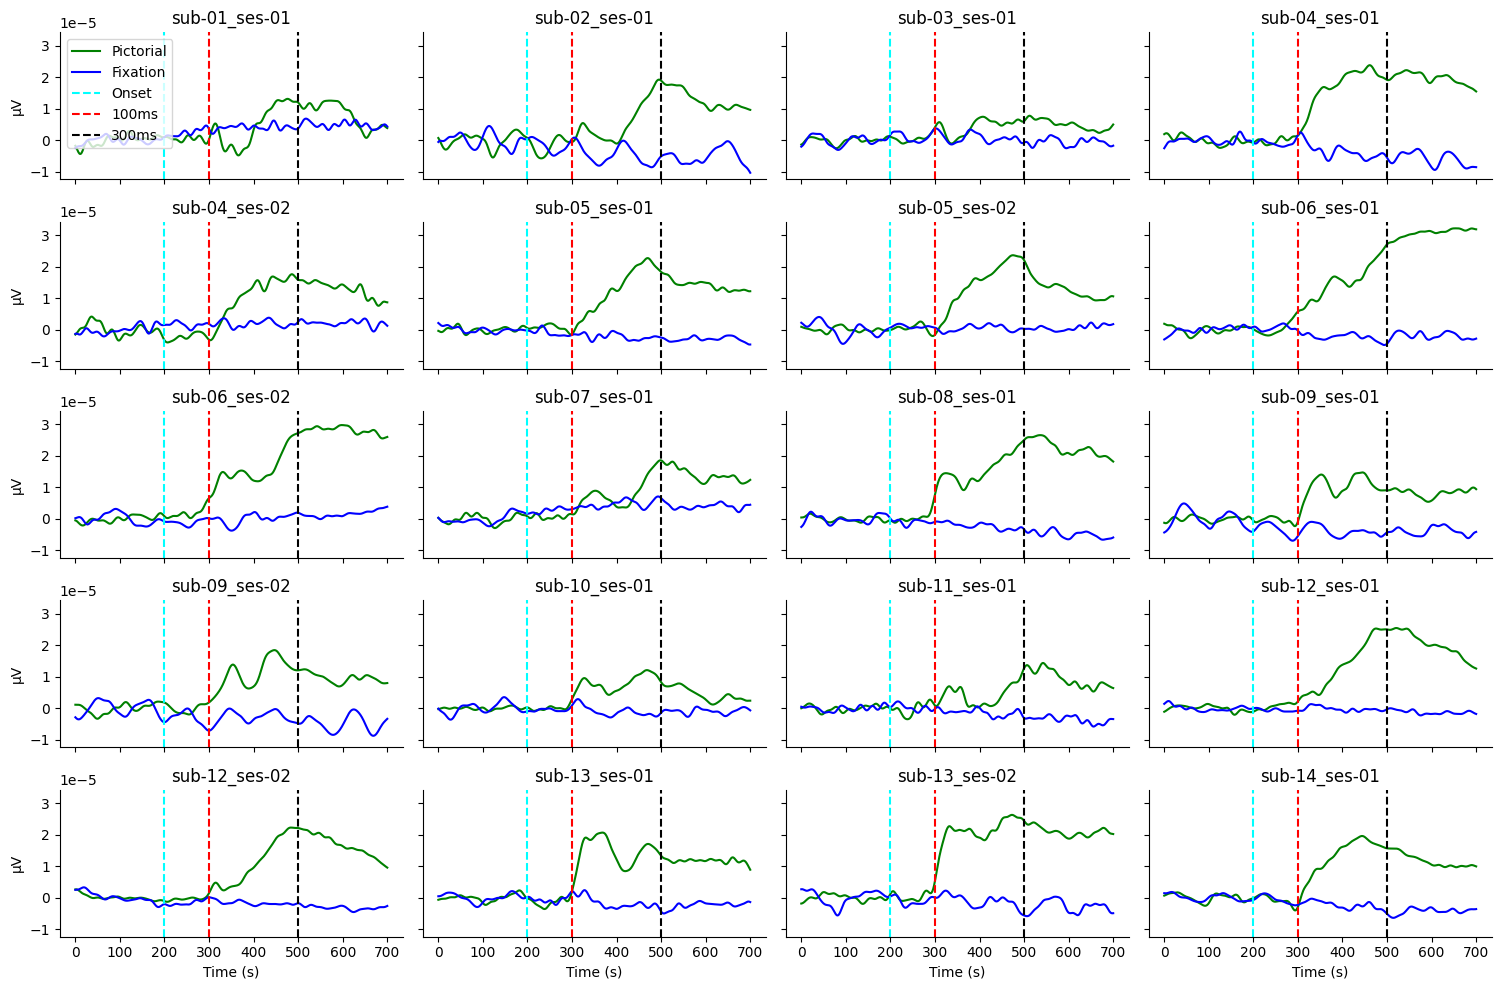

In [41]:
trial_mode='Real'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
channels = ['PO3', 'POz', 'PO4']
plot_vs_fixation_all_subjects(
    registery=reg,
    trial_mode= trial_mode, trial_unit=trial_unit, 
    experiment_mode= experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality,
    selected_channels=channels
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use

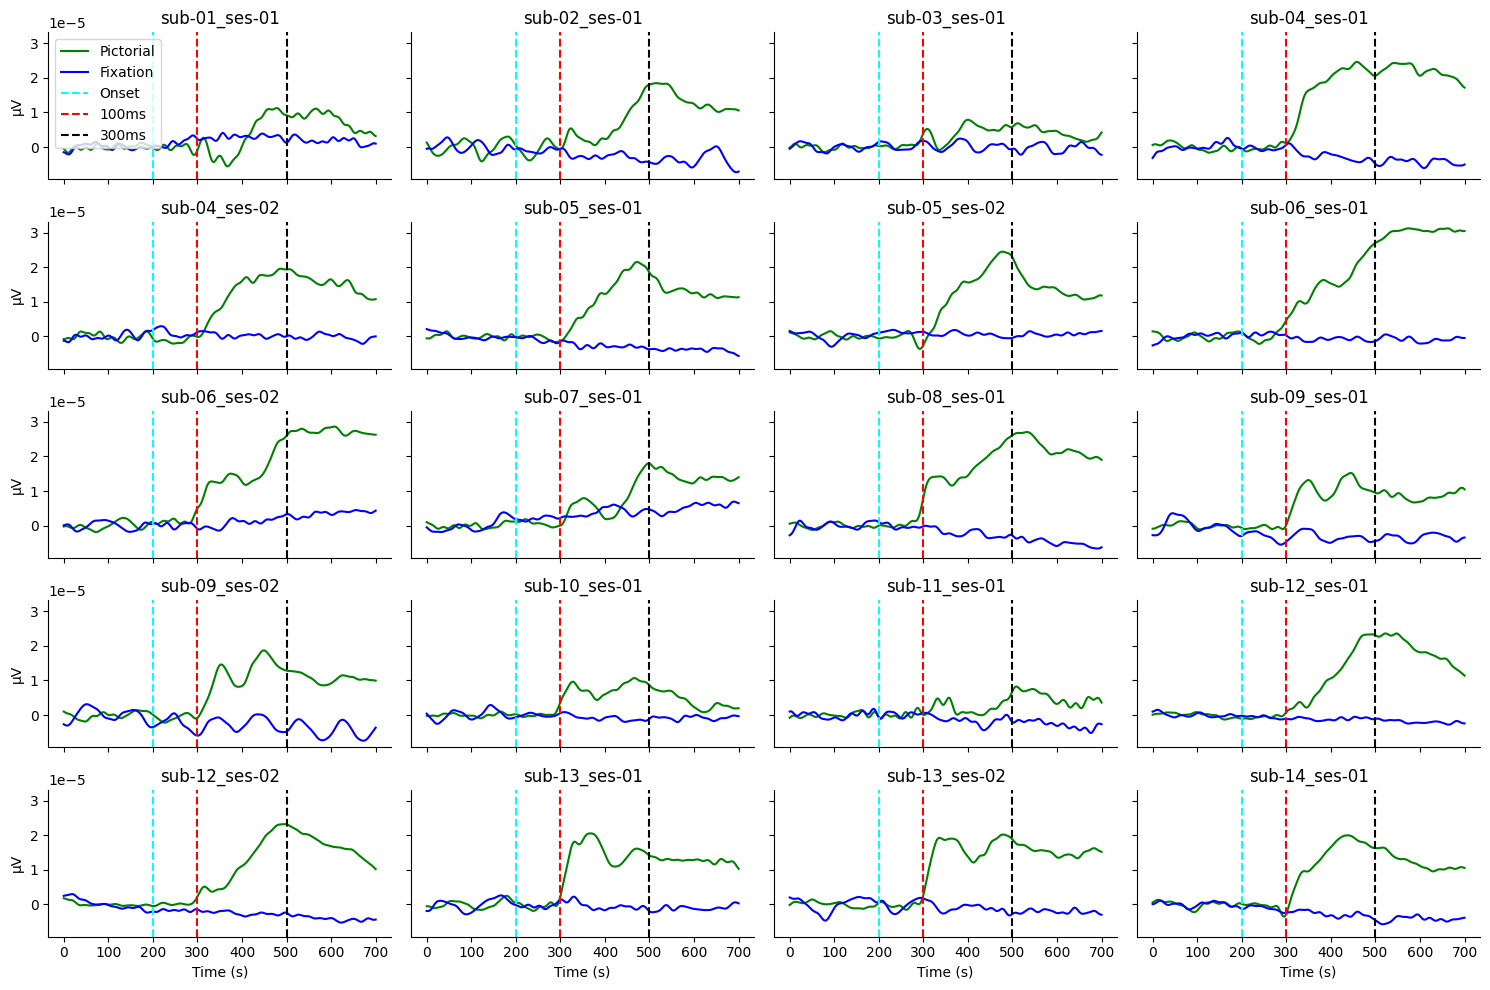

In [42]:
trial_mode=''
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
channels = ['PO3', 'POz', 'PO4']
plot_vs_fixation_all_subjects(
    registery=reg,
    trial_mode= trial_mode, trial_unit=trial_unit, 
    experiment_mode= experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality,
    selected_channels=channels
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Silent     ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/Silent_Words_Experiment_Start_Stimulus_Pictures_Fixation_Visual_p100_p300_plot_all.png


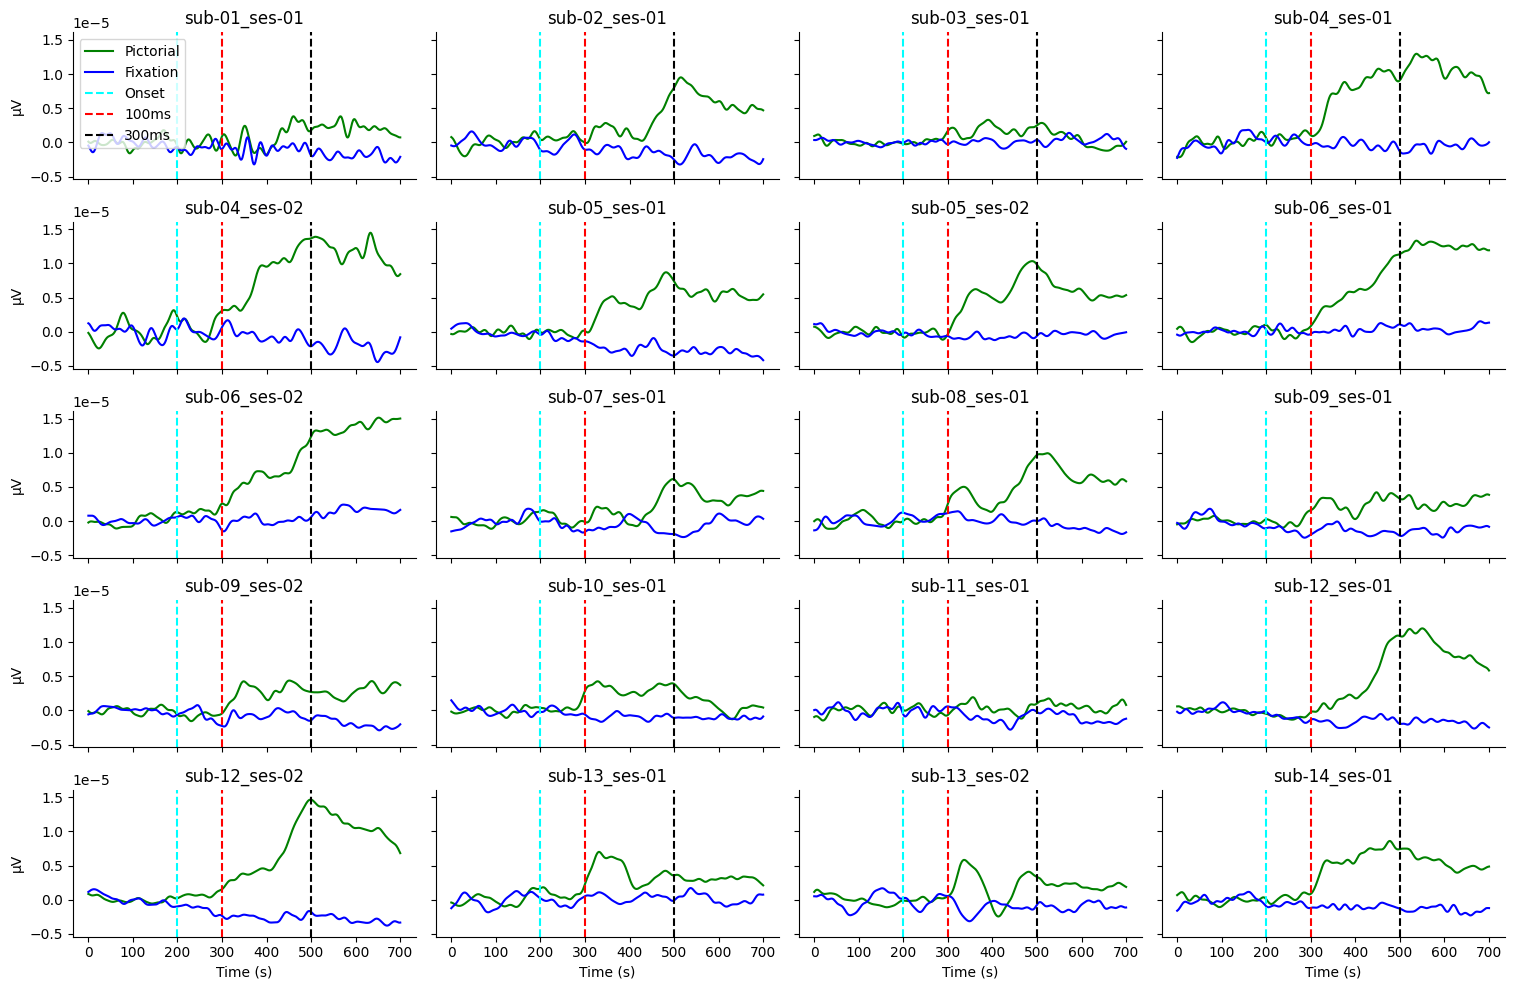

In [43]:
trial_mode='Silent'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
plot_vs_fixation_all_subjects(
    registery=reg,
    trial_mode= trial_mode, trial_unit=trial_unit, 
    experiment_mode= experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality,
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃ Real       ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 65 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/Real_Words_Experiment_Start_Stimulus_Pictures_Fixation_Visual_p100_p300_plot_all.png


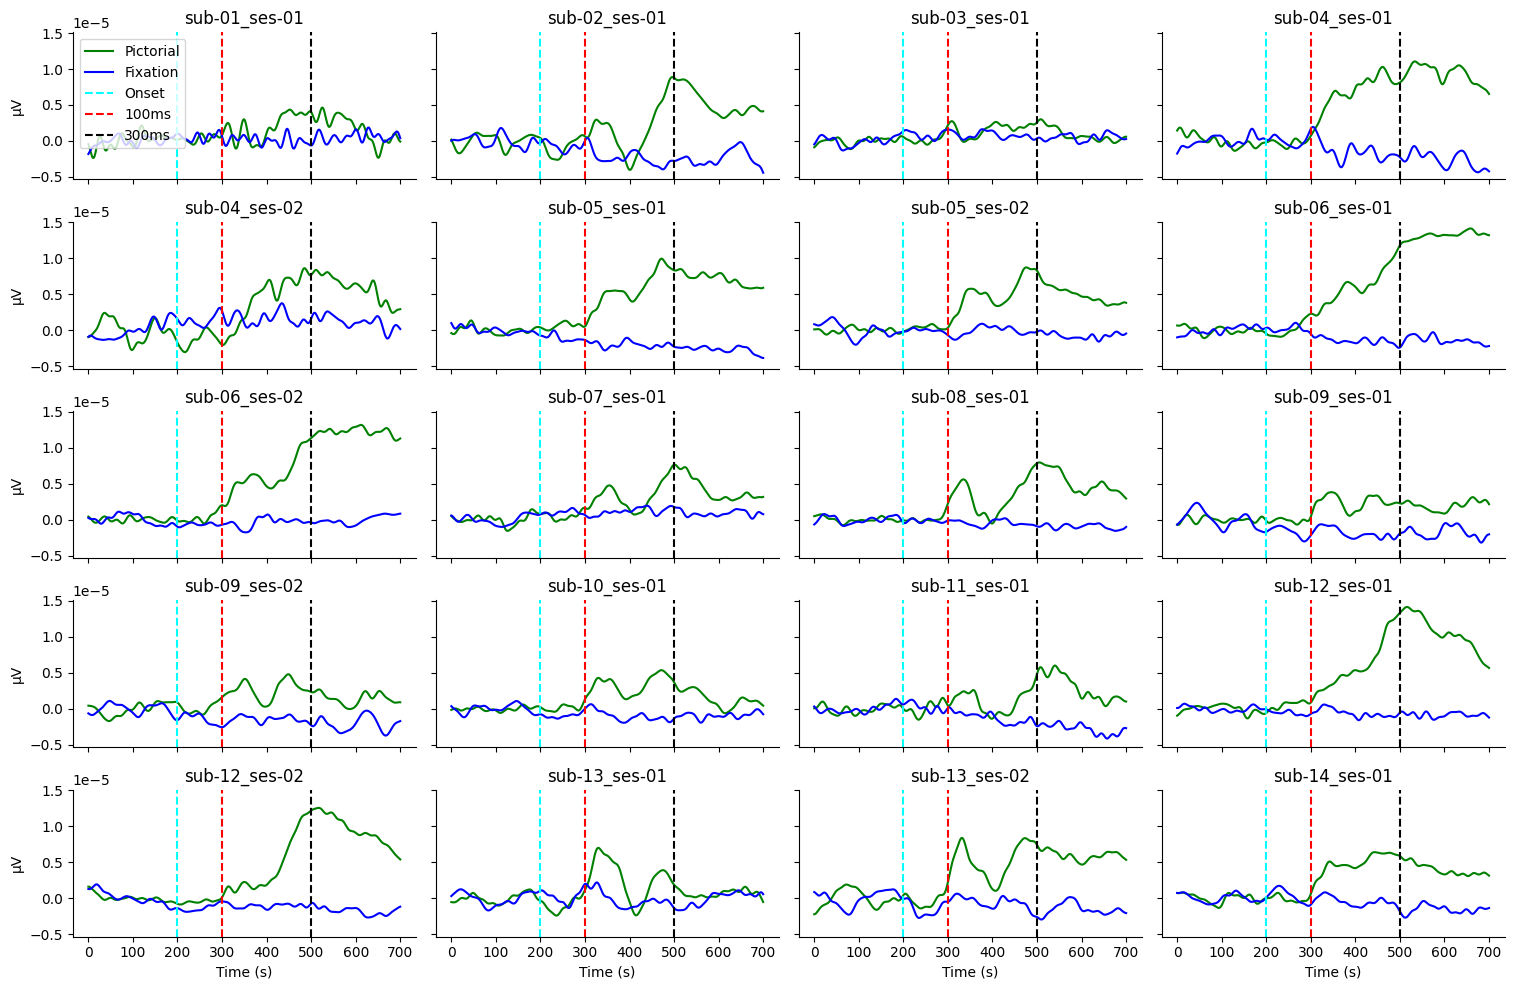

In [44]:
trial_mode='Real'
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
plot_vs_fixation_all_subjects(
    registery=reg,
    trial_mode= trial_mode, trial_unit=trial_unit, 
    experiment_mode= experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality,
)

Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Creating EPOCHS for all subjects

Loading for sub-01, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-02, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-03, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-04, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-05, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-06, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-07, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-08, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-09, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-10, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-11, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-12, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-13, ses-02

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


Loading for sub-14, ses-01

╭────────────────────────────────╮
│  Initializing DataLoader Class │
╰────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ 0.3        ┃
┃ ⏳ Tmax            ┃ 1.0        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
Saved plot to /home/owaismujtaba/projects/elsavier/Images/_Words_Experiment_Start_Stimulus_Pictures_Fixation_Visual_p100_p300_plot_all.png


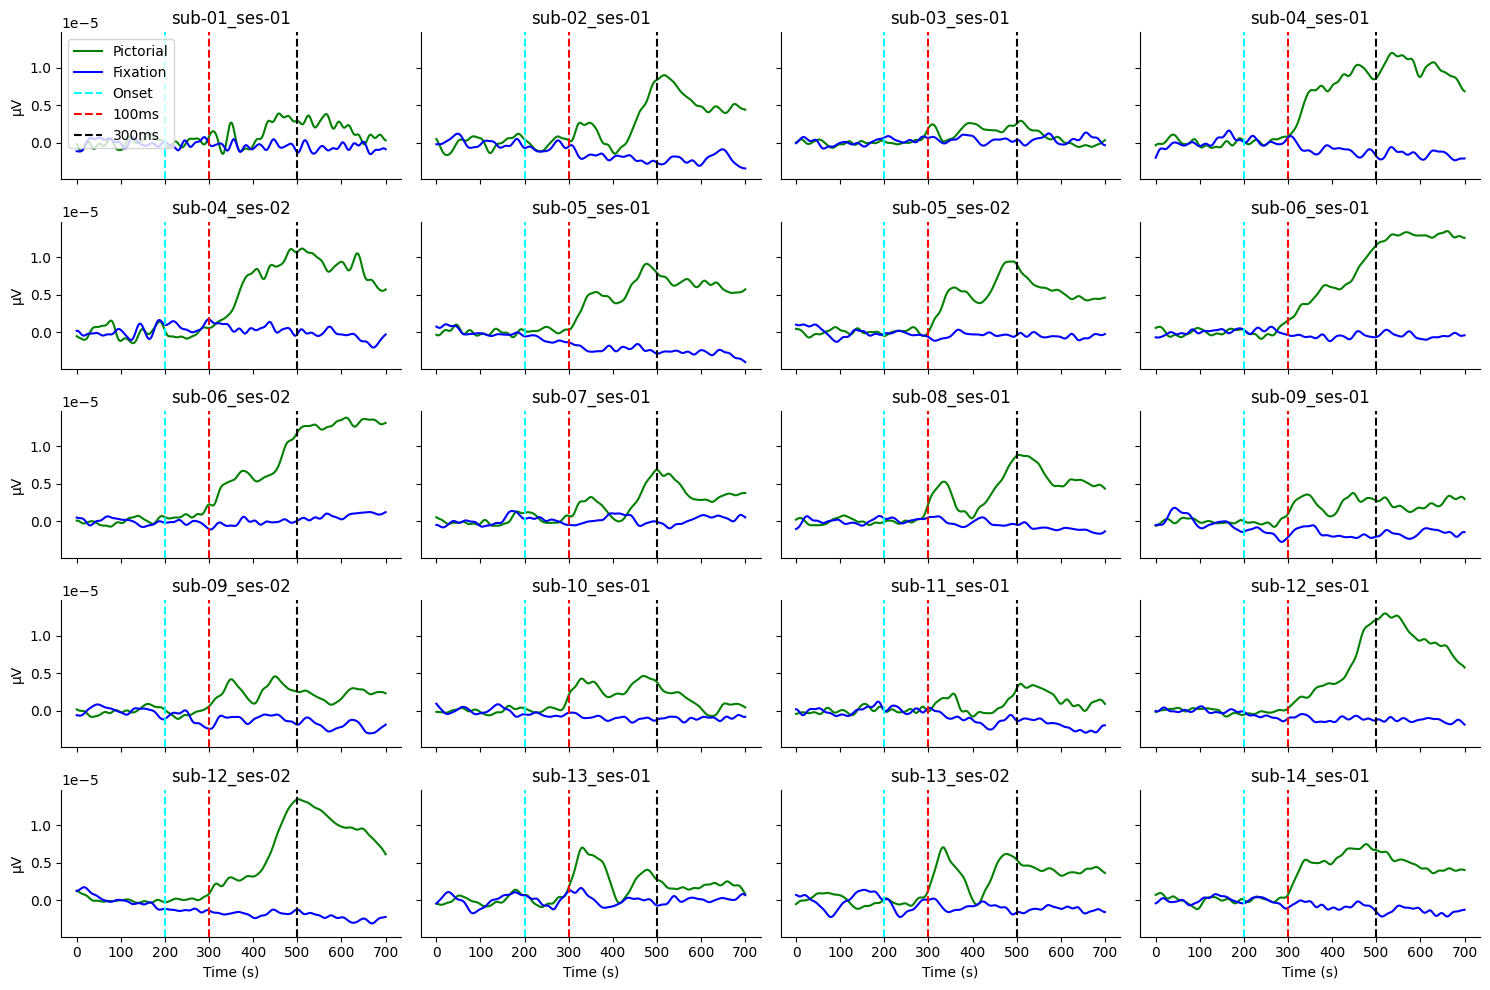

In [45]:
trial_mode=''
trial_unit='Words'
experiment_mode='Experiment'
trial_boundary='Start'
trial_type='Stimulus'
modality='Pictures'
plot_vs_fixation_all_subjects(
    registery=reg,
    trial_mode= trial_mode, trial_unit=trial_unit, 
    experiment_mode= experiment_mode, trial_boundary=trial_boundary,
    trial_type=trial_type, modality=modality,
)